# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out!

## Dependencies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
%matplotlib inline

## Import  and Inspect Data
* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [3]:
customers = pd.read_csv('Ecommerce Customers')
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

##### Time on Website v. Yearly Amount Spent

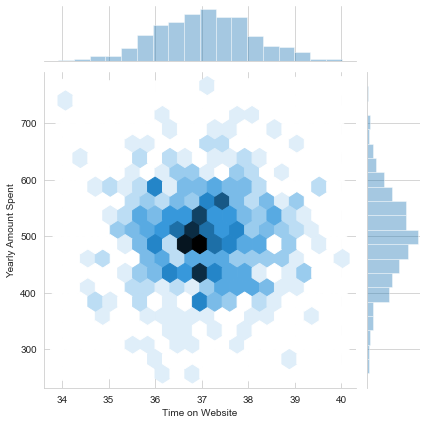

In [6]:
sns.jointplot(data=customers, x='Time on Website',y='Yearly Amount Spent',kind='hex')

##### Time on App v. Yearly Amount Spent

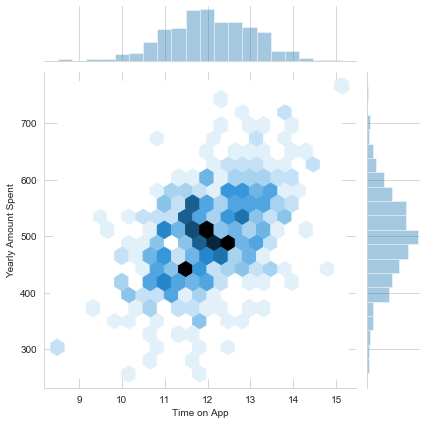

In [7]:
sns.jointplot(data=customers, x='Time on App',y='Yearly Amount Spent',kind='hex')

##### Time on App v. Length of Membership

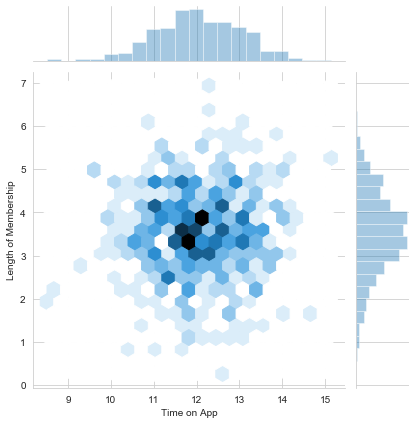

In [8]:
sns.jointplot(data=customers, x='Time on App',y='Length of Membership',kind='hex')

##### Overall Correlations

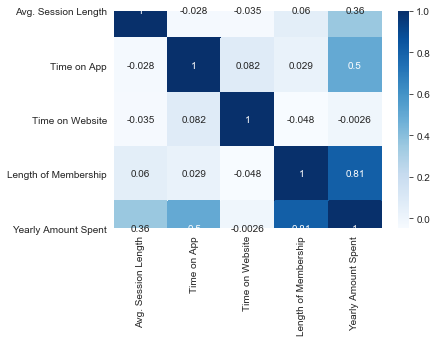

In [9]:
sns.heatmap(customers.corr(), annot=True, cmap='Blues')

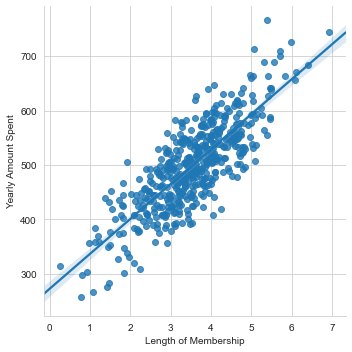

In [10]:
sns.lmplot(data=customers, x='Length of Membership',y='Yearly Amount Spent')

## Train/Test Split

In [11]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [12]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Create & Train Model

In [14]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluate Model

In [15]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Predictions from Model

In [16]:
predictions = lm.predict( X_test)

Text(0.5, 0, 'Test')

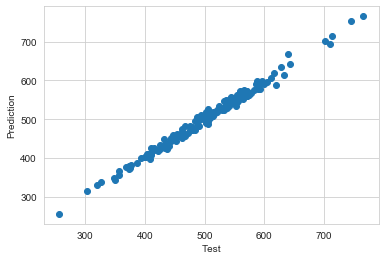

In [17]:
plt.scatter(y_test,predictions)

plt.ylabel('Prediction')
plt.xlabel('Test')

## Evaluating the Model

***Evaluation Metrics***

In [18]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"MAE: {mae}\nMSE: {mse}\nRSME: {rmse}")

MAE: 7.228148653430839
MSE: 79.81305165097469
RSME: 8.933815066978648


***Residuals***

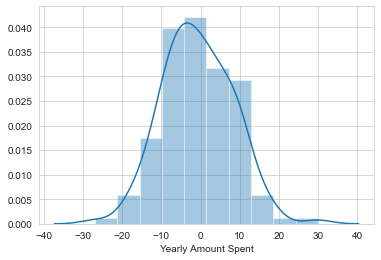

In [19]:
residuals = y_test - predictions
sns.distplot(residuals, bins=10)

## Conclusion
Should the organization focus efforts on their app or website?

In [20]:
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**The customers' time on the app has a higher influence on dollar spent when compared to the customers' time on the website.  Although minimal information was provided about the organization and their customer base, I would recommend focusing their efforts on the website.**

**On average, customers spend three times as long on the website. This is potentially due to a differences in the interface and navigation. I would suggest taking a deeper dive and determining what draws customers to the app (over the website) and apply the finding to the development of the website in attempt to raise the 'Time on Website' coefficient and close the gap in the time spent/dollar spent ratio between the two platforms**